In [13]:
!pip install star

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [14]:
nodes = {'A': [('B', 100), ('C', 20)],
         'C': [('D', 20)],
         'D': [('B', 20)]}

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import astar

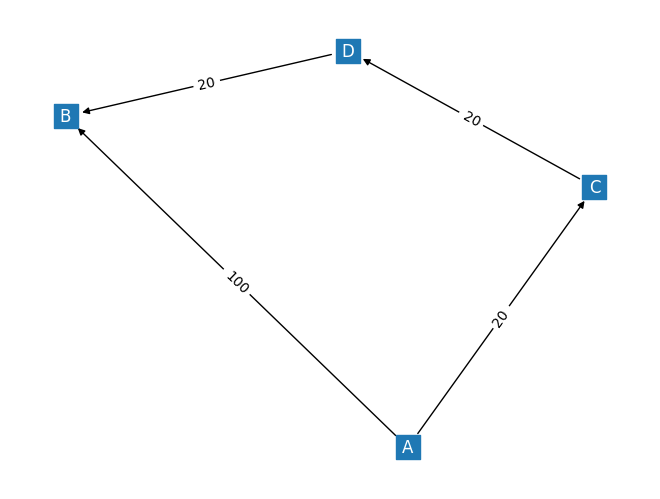

In [19]:
def show_wgraph(G):
    plt.figure()    
    pos = nx.spring_layout(G)
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw(G,pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

G = nx.DiGraph()

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')

G.add_edge('A', 'B', weight=100)
G.add_edge('A', 'C', weight=20)
G.add_edge('C', 'D', weight=20)
G.add_edge('D', 'B', weight=20)

show_wgraph(G)

In [20]:
class GraphAStar(astar.AStar):
    def __init__(self, nodes):
        self.nodes = nodes

    def neighbors(self, node):
        for n, d in self.nodes[node]:
            yield n

    # g function
    def distance_between(self, n1, n2):
        for n, d in self.nodes[n1]:
            if n == n2:
                return d

    # h function
    def heuristic_cost_estimate(self, current, goal):
        return 1
        

In [21]:
graph_solver = GraphAStar(nodes)
print(list(graph_solver.astar('A', 'B')))
print(list(graph_solver.astar('A', 'C')))

['A', 'C', 'D', 'B']
['A', 'C']
